**Supply chain and logistic analysis on DataCo company**

***Importing Standard libraries***

In [ ]:
# standard imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from numpy import mean

# data preparation
from sklearn.preprocessing import StandardScaler

# machine learning
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc, recall_score, matthews_corrcoef,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving DataCoSupplyChainDataset.csv to DataCoSupplyChainDataset.csv


A supply chain includes every step that is involved in getting a finished product or service to the customer. The steps may include sourcing raw materials, moving them to production, then transporting the finished products to a distribution center or retail store where they may be delivered to the consumer.

***Importing DataCo company dataset(2015-2018)***

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/DataCoSupplyChainDataset.csv',encoding='ISO-8859-1')
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


**Data Cleaning**

In [ ]:
#dropping the columns which have total null values greater than 75
df = df.dropna(thresh=len(df)*0.75, axis = 1)
df.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   8
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrde

In [ ]:
df.shape# (180508, 51)

(180519, 51)

In [ ]:
df_clean= df.dropna(axis=0, subset=['Customer Zipcode','Customer Lname'])
df_clean.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   0
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrde

In [ ]:
df_clean.shape

(180508, 51)

In [ ]:
#interpretations/insights
#type of payment and why
#actual vs schedule
#delivery status barchart
#what are the different categories that are being delivered top -10
#customer segment vs customer country i.e.; from which part of the city and which segment that customer belongs to
#customer segment and benefit per order
#category of product and sales and country
#product name and benefit per order
#product name and order region
#what is the shipping mode preferred by the customers
#order region and profit

**Insights**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install --upgrade openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 KB 11.2 MB/s eta 0:00:00
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.10
    Uninstalling openpyxl-3.0.10:
      Successfully uninstalled openpyxl-3.0.10


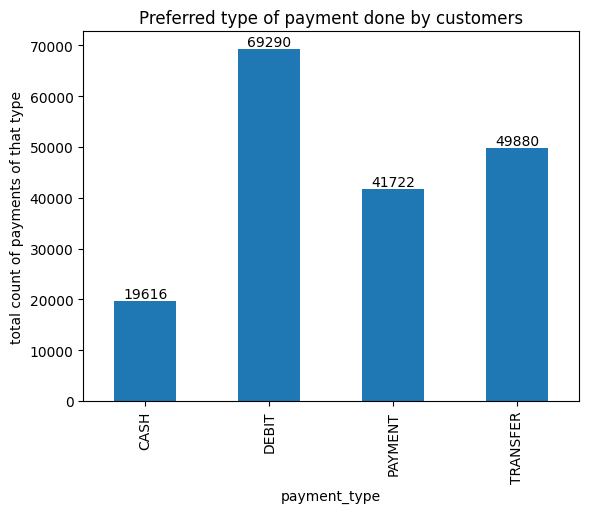

In [ ]:
df_clean_1=df_clean.groupby('Type')['Type'].count()
ax=df_clean_1.plot(kind='bar',title='Preferred type of payment done by customers',xlabel='payment_type',ylabel='total count of payments of that type')
for i, v in enumerate(df_clean_1):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

From the above bar chart we can interpret that most of the payments are online payments and the most preferred payment is done through debit card and next online transfer.

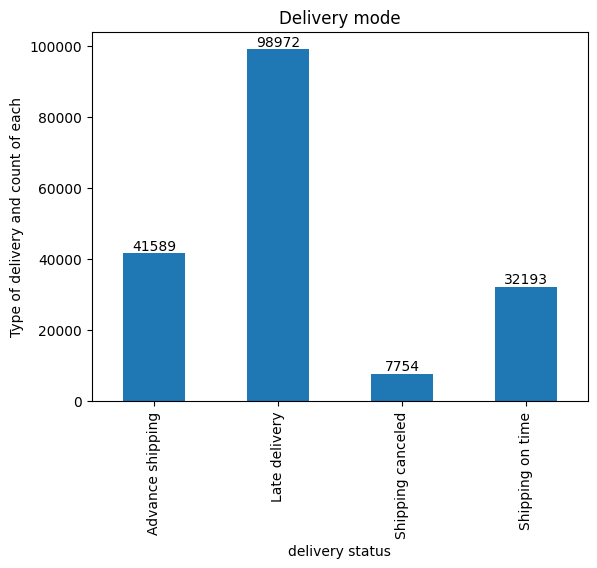

In [ ]:
#delivery status barchart
df_clean_1=df_clean.groupby('Delivery Status')['Delivery Status'].count()
ax=df_clean_1.plot(kind='bar',title='Delivery mode',xlabel='delivery status',ylabel='Type of delivery and count of each')
for i, v in enumerate(df_clean_1):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

From the above interpretation we can observe there are more number of late deliveries compared to on time delivery and very less number of shipping got cancelled

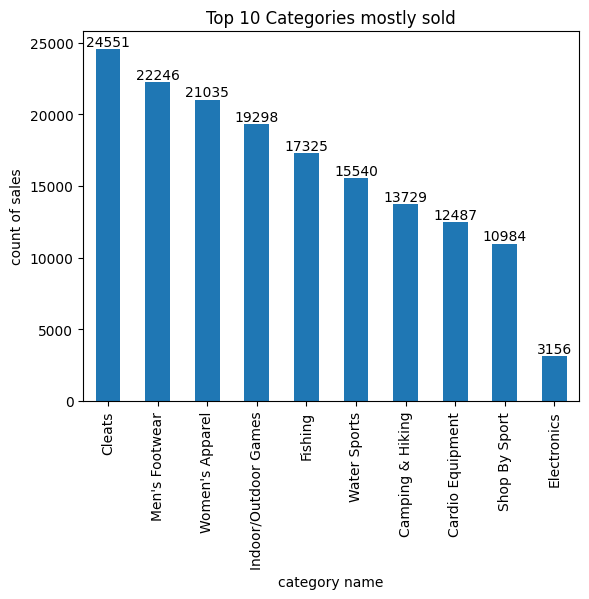

In [ ]:
#what are the different categories that are being delivered top -10
df2=df_clean.groupby('Category Name')['Category Name'].count()
df2.sort_values(ascending=False,inplace=True)
df2=df2.head(10)
ax=df2.plot(kind='bar',title='Top 10 Categories mostly sold',xlabel='category name',ylabel='count of sales')
for i, v in enumerate(df2):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

The most sold categories are cleats,mens footware,women's apparel,games and fishing

In [ ]:
#customer segment vs customer country i.e.; from which part of the city and which segment that customer belongs to
df3=df_clean.groupby(['Customer Country','Customer Segment'])['Customer Segment'].count()
df3

Customer Country  Customer Segment
EE. UU.           Consumer            57827
                  Corporate           33990
                  Home Office         19320
Puerto Rico       Consumer            35674
                  Corporate           20794
                  Home Office         12903
Name: Customer Segment, dtype: int64

In [ ]:
#Split data
dfk_1 = df3.iloc[:3,]
dfk_2 = df3.iloc[3:,]
dfk_1

Customer Country  Customer Segment
EE. UU.           Consumer            57827
                  Corporate           33990
                  Home Office         19320
Name: Customer Segment, dtype: int64

In [ ]:
dfk_2

Customer Country  Customer Segment
Puerto Rico       Consumer            35674
                  Corporate           20794
                  Home Office         12903
Name: Customer Segment, dtype: int64

array([<Axes: ylabel='Customer Segment'>], dtype=object)

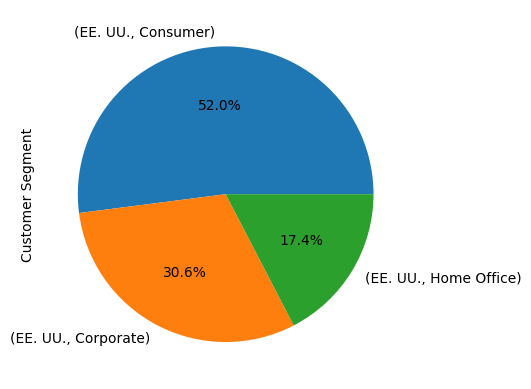

In [ ]:
dfk_1.plot.pie(subplots = True,autopct="%1.1f%%")

array([<Axes: ylabel='Customer Segment'>], dtype=object)

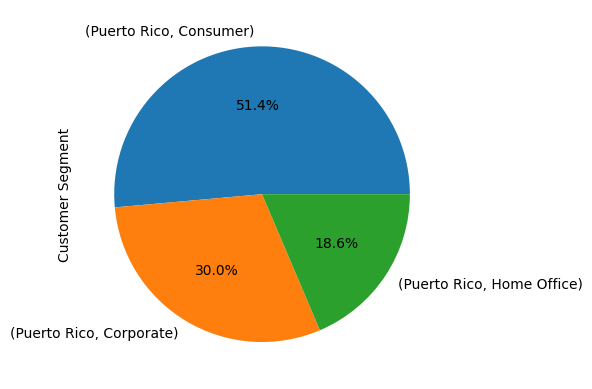

In [ ]:
dfk_2.plot.pie(subplots = True,autopct="%1.1f%%")

We can interpret that the highest number of customers are consumers from United States of America.

In [ ]:
#Benefit per order and Customer Segment
df_ben =  df_clean.groupby(['Customer Segment'])['Order Profit Per Order'].sum()
df_ben

Customer Segment
Consumer       2.073203e+06
Corporate      1.202037e+06
Home Office    6.908020e+05
Name: Order Profit Per Order, dtype: float64

array([<Axes: ylabel='Order Profit Per Order'>], dtype=object)

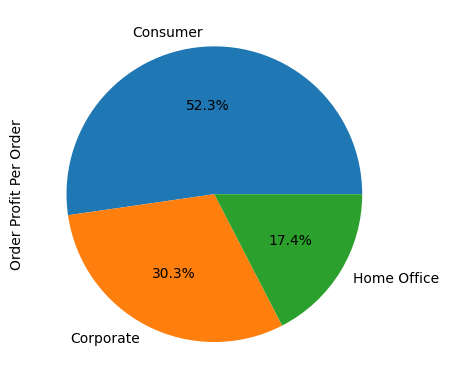

In [ ]:
df_ben.plot.pie(subplots = True,autopct="%1.1f%%")

In [ ]:
#Profits per country
df_country = df_clean.groupby(['Order Country','Order City'])['Order Profit Per Order'].sum().reset_index(name='Profit of Orders')
dfa = pd.DataFrame(df_country, columns = ['Order Country','Order City','Profit of Orders'])
#Choropleth map to represent the amount of mismanaged waste by country
fig = px.choropleth(dfa,
              locationmode='country names',
              locations = 'Order Country',
              color='Profit of Orders',
              hover_name ='Order Country',
              color_continuous_scale='plasma',
              width=1000,
              height=500,
              title ="Profit of each country"
              )
fig.show()

In [ ]:
import datetime as dt

data_orderdate=df_clean[['order date (DateOrders)', 'Sales']]
data_orderdate['order_date'] = pd.to_datetime(data_orderdate['order date (DateOrders)'])
data_orderdate

,order date (DateOrders),Sales,order_date
0,1/31/2018 22:56,327.750000,2018-01-31 22:56:00
1,1/13/2018 12:27,327.750000,2018-01-13 12:27:00
2,1/13/2018 12:06,327.750000,2018-01-13 12:06:00
3,1/13/2018 11:45,327.750000,2018-01-13 11:45:00
4,1/13/2018 11:24,327.750000,2018-01-13 11:24:00
...,...,...,...
180514,1/16/2016 3:40,399.980011,2016-01-16 03:40:00
180515,1/16/2016 1:34,399.980011,2016-01-16 01:34:00
180516,1/15/2016 21:00,399.980011,2016-01-15 21:00:00
180517,1/15/2016 20:18,399.980011,2016-01-15 20:18:00


In [ ]:
data_orderdate["Quarter"] = data_orderdate['order_date'].dt.quarter
data_orderdate["Month"] = data_orderdate['order_date'].dt.month
data_orderdate["year"] = data_orderdate['order_date'].dt.year
data_orderdate

,order date (DateOrders),Sales,order_date,Quarter,Month,year
0,1/31/2018 22:56,327.750000,2018-01-31 22:56:00,1,1,2018
1,1/13/2018 12:27,327.750000,2018-01-13 12:27:00,1,1,2018
2,1/13/2018 12:06,327.750000,2018-01-13 12:06:00,1,1,2018
3,1/13/2018 11:45,327.750000,2018-01-13 11:45:00,1,1,2018
4,1/13/2018 11:24,327.750000,2018-01-13 11:24:00,1,1,2018
...,...,...,...,...,...,...
180514,1/16/2016 3:40,399.980011,2016-01-16 03:40:00,1,1,2016
180515,1/16/2016 1:34,399.980011,2016-01-16 01:34:00,1,1,2016
180516,1/15/2016 21:00,399.980011,2016-01-15 21:00:00,1,1,2016
180517,1/15/2016 20:18,399.980011,2016-01-15 20:18:00,1,1,2016


In [ ]:
data_orderdate['YearStr']=data_orderdate['year'].astype(str)
df_sales_year=data_orderdate.groupby([ 'YearStr'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_year, x='Sales of Orders',y = 'YearStr',color ='Sales of Orders')

In [ ]:
dfship = df_clean.groupby(['Shipping Mode'])['Shipping Mode'].count().reset_index(name='Count')
dfshipsink = pd.DataFrame(dfship, columns = ['Shipping Mode','Count'])
dfshipsink

,Shipping Mode,Count
0,First Class,27812
1,Same Day,9737
2,Second Class,35214
3,Standard Class,107745


<Axes: xlabel='Shipping Mode', ylabel='Count'>

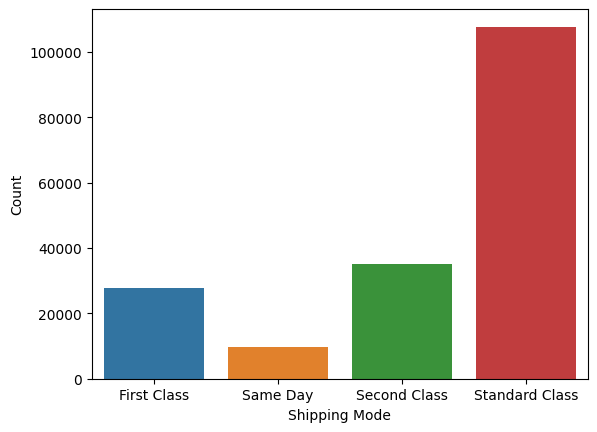

In [ ]:
sns.barplot(data = dfshipsink, x ="Shipping Mode",y= "Count")

In [ ]:
df_new=df_clean[['Benefit per order','Sales per customer','Late_delivery_risk','Order Item Discount','Order Item Discount Rate','Order Item Product Price','Order Item Profit Ratio','Sales','Order Item Total','Order Profit Per Order','Product Price']]
df_new

,Benefit per order,Sales per customer,Late_delivery_risk,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Sales,Order Item Total,Order Profit Per Order,Product Price
0,91.250000,314.640015,0,13.110000,0.04,327.750000,0.29,327.750000,314.640015,91.250000,327.750000
1,-249.089996,311.359985,1,16.389999,0.05,327.750000,-0.80,327.750000,311.359985,-249.089996,327.750000
2,-247.779999,309.720001,0,18.030001,0.06,327.750000,-0.80,327.750000,309.720001,-247.779999,327.750000
3,22.860001,304.809998,0,22.940001,0.07,327.750000,0.08,327.750000,304.809998,22.860001,327.750000
4,134.210007,298.250000,0,29.500000,0.09,327.750000,0.45,327.750000,298.250000,134.210007,327.750000
...,...,...,...,...,...,...,...,...,...,...,...
180514,40.000000,399.980011,0,0.000000,0.00,399.980011,0.10,399.980011,399.980011,40.000000,399.980011
180515,-613.770019,395.980011,1,4.000000,0.01,399.980011,-1.55,399.980011,395.980011,-613.770019,399.980011
180516,141.110001,391.980011,1,8.000000,0.02,399.980011,0.36,399.980011,391.980011,141.110001,399.980011
180517,186.229996,387.980011,0,12.000000,0.03,399.980011,0.48,399.980011,387.980011,186.229996,399.980011


**Data preprocessing**

In [ ]:
#feature selection,dimensionality reduction,model selection
#dimensionality reduction
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler #standardize the dataframe
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_new)
pca=PCA(n_components=3)
pca.fit(data_scaled)
d2=pca.transform(data_scaled) #x*eigenvectors->zcomponents
d2

array([[ 2.4797729 , -0.65604211, -1.36648692],
       [ 1.69371384,  4.42279362, -1.31203784],
       [ 1.71345665,  4.41016863, -1.15737485],
       ...,
       [ 3.72401081, -1.1322897 , -1.96861022],
       [ 3.85986498, -1.76804557, -1.72761627],
       [ 3.84792145, -1.51743498, -1.50785476]])

In [ ]:
var = pca.explained_variance_
prop_var = var / np.sum(var)
cum_prop_var = pca.explained_variance_ratio_.cumsum()
print("Variance: ", var)
print("Proportion of Variance: ", prop_var)
print("Cumulative Proportion of Variance: ", cum_prop_var)

Variance:  [4.89109147 2.71952945 1.52247088]
Proportion of Variance:  [0.53553513 0.29776657 0.1666983 ]
Cumulative Proportion of Variance:  [0.44464222 0.6918708  0.83027647]


In [ ]:
y = df_clean.Late_delivery_risk #response variable
y

0         0
1         1
2         0
3         0
4         0
         ..
180514    0
180515    1
180516    1
180517    0
180518    0
Name: Late_delivery_risk, Length: 180508, dtype: int64

In [ ]:
pca_df=pd.DataFrame(d2,columns=['z1','z2','z3'])
#pca_df
pca_df['response']=y
pca_df

,z1,z2,z3,response
0,2.479773,-0.656042,-1.366487,0.0
1,1.693714,4.422794,-1.312038,1.0
2,1.713457,4.410169,-1.157375,0.0
3,2.388033,0.381809,-0.779605,0.0
4,2.698915,-1.269770,-0.315654,0.0
...,...,...,...,...
180503,3.439872,0.267123,-2.468322,0.0
180504,1.958888,9.482936,-2.505842,0.0
180505,3.724011,-1.132290,-1.968610,0.0
180506,3.859865,-1.768046,-1.727616,1.0


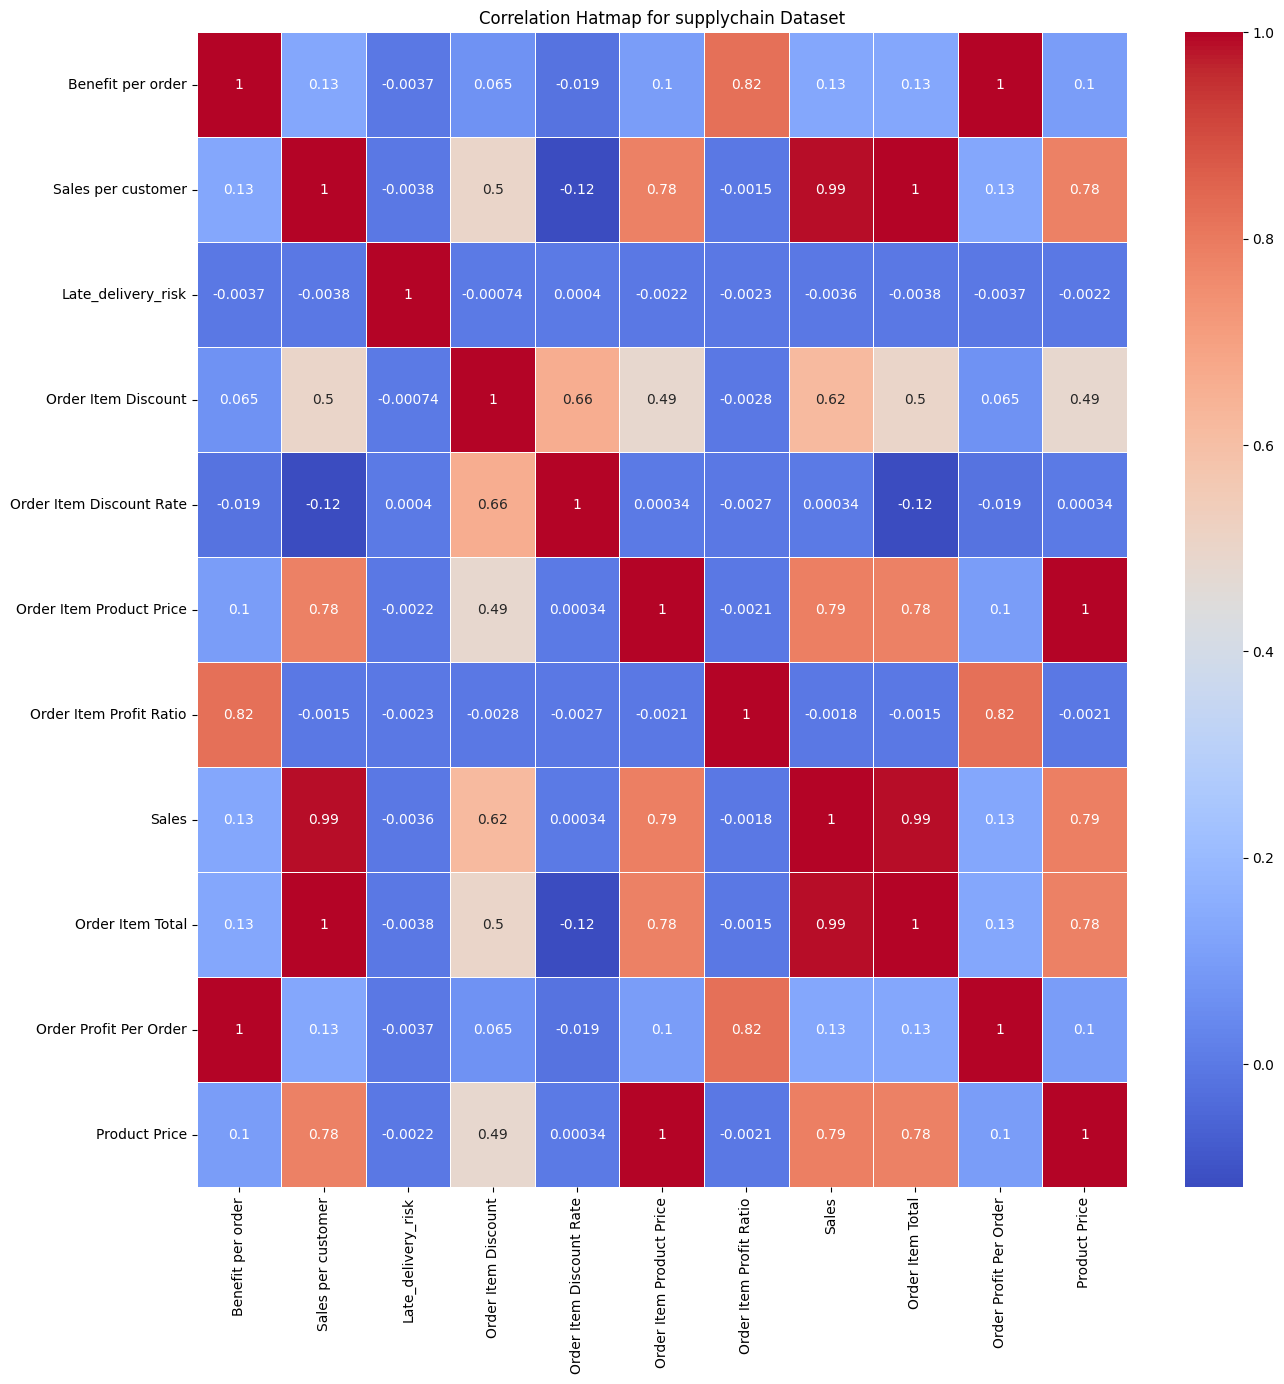

In [ ]:
#Plot a correlation heatmap for the Air Quality dataset
sns.heatmap(df_new.corr(),annot=True,cmap='coolwarm',linewidth=0.4)
plt.title('Correlation Heatmap for supplychain Dataset')
plt.gcf().set_size_inches(15,15)
plt.show()

In [ ]:
from matplotlib.cbook import print_cycles
from functools import total_ordering
from pandas.core.dtypes.dtypes import Ordered
#pearson correlation
#highly correlated variables >0.7
#benefit per order vs order item profit ratio
#benefit per order vs order profit per Order
#sales per customer vs order item product price
#sales per customer vs sales
#sales per customer vs order item total
#sales per customer vs product price
#order item product price vs sales per customer
#order item product price vs sales
#order item product price vs order item total
#order item profit ratio vs benefit per order
#order item profit ratio vs order item total
#order profit per order vs order item profit ratio
#product price vs order item profit price
#product price vs sales
target_variable_1=df_new['Benefit per order']
target_variable_2=df_new['Order Item Profit Ratio']
response_variable=df['Late_delivery_risk']
corr1 = target_variable_1.corr(response_variable)
corr2 = target_variable_2.corr(response_variable)
corr1,corr2
#Both the correlations are negative hence we can determine that bothe the target variables are less correlated with the response variable.Not considering both the variables

(-0.0037285968390674976, -0.0023187433844773326)

In [ ]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Image',
       'Product Na

In [ ]:
X = df[['Days for shipping (real)','Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Product Price']]
y = df['Late_delivery_risk']
corr_matrix = np.corrcoef(X, y, rowvar=False)
corr_coeffs = corr_matrix[:-1, -1]
print('Correlation coefficients:')
for i in range(len(corr_coeffs)):
    print(f'Independent variable {i+1}: {corr_coeffs[i]:.3f}')

Correlation coefficients:
Independent variable 1: 0.401
Independent variable 2: -0.369
Independent variable 3: -0.004
Independent variable 4: -0.004
Independent variable 5: -0.001
Independent variable 6: 0.000
Independent variable 7: -0.002
Independent variable 8: -0.002
Independent variable 9: -0.000
Independent variable 10: -0.004
Independent variable 11: -0.004
Independent variable 12: -0.004
Independent variable 13: -0.002


In [ ]:
# from the above correlation we can conclude that 'Days for shipping (real)', 'Days for shipment (scheduled)' are highly correlated comparitevely to others .So,considering only those two

Splitting the data into training and testing data 70:30

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Assume X is a numpy array of features and y is a numpy array of target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Data exploration**

**Logistic Regression**

In [ ]:
# Create the logistic regression model
logreg = LogisticRegression(random_state=42)

# Train the model on the training set
logreg.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = logreg.predict(X_test)

In [ ]:
# Evaluate the model using accuracy score, F1 score, confusion matrix, sensitivity, specificity and ROC AUC score

print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("F1 score:", round(f1_score(y_test, y_pred),3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("MCC :", round(matthews_corrcoef(y_test, y_pred),3))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob = logreg.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC score:", round(roc_auc,3))

Accuracy: 0.975
F1 score: 0.978
Confusion Matrix:
 [[23071  1340]
 [    0 29745]]
MCC : 0.951
Sensitivity: 1.0
Specificity: 0.945
ROC AUC score: 0.973


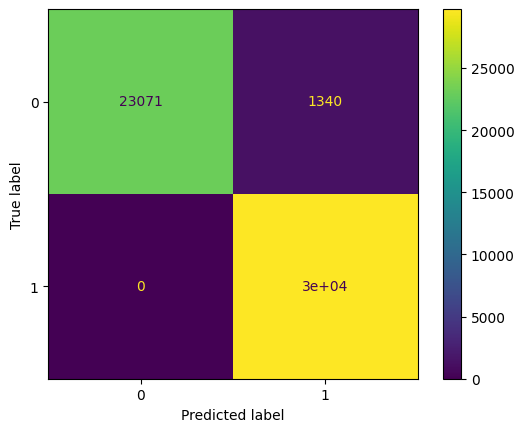

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     24411
           1       0.96      1.00      0.98     29745

    accuracy                           0.98     54156
   macro avg       0.98      0.97      0.97     54156
weighted avg       0.98      0.98      0.98     54156



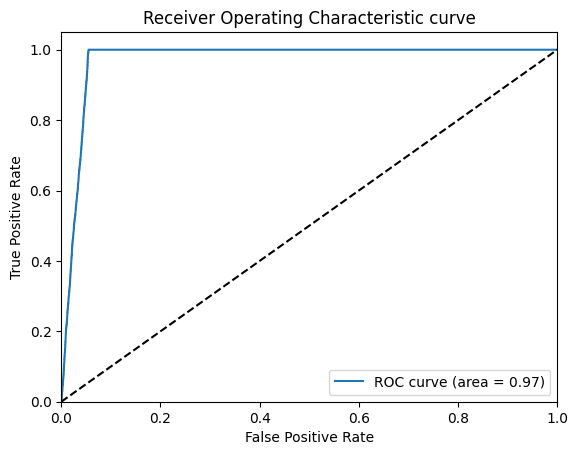

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

**Decision Tree**

In [ ]:
# Create the decision tree classifier model
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the model using accuracy score, F1 score, confusion matrix, sensitivity, specificity and ROC AUC score

print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("F1 score:", round(f1_score(y_test, y_pred),3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("MCC :", round(matthews_corrcoef(y_test, y_pred),3))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob = clf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", round(roc_auc,3))

Accuracy: 0.949
F1 score: 0.954
Confusion Matrix:
 [[23136  1275]
 [ 1473 28272]]
MCC : 0.898
Sensitivity: 0.95
Specificity: 0.948
ROC AUC score: 0.949


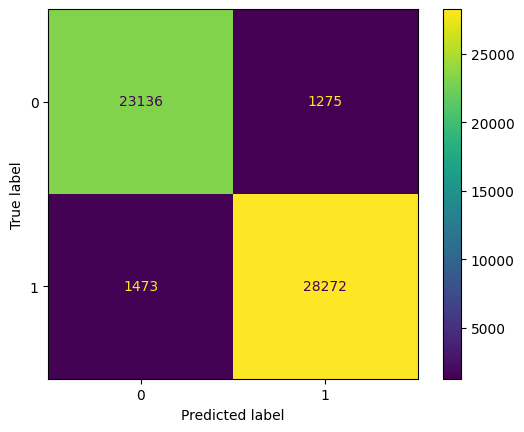

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

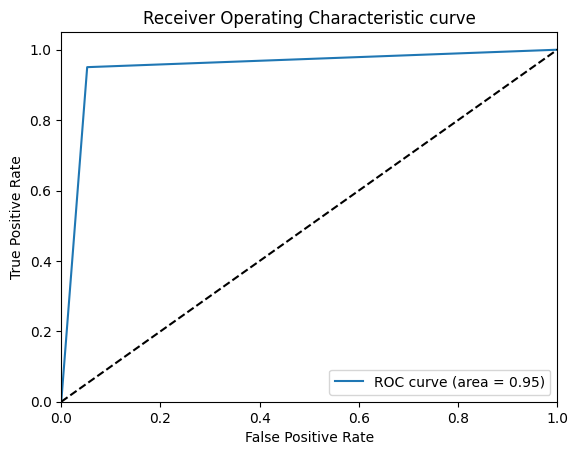

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

**Random Forest Classifier**

In [ ]:
# Initialize a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)

# Fit the model on the training data
rf_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_clf.predict(X_test)
y_predx = rf_clf.predict(X_train)

In [ ]:
# Evaluate the model using accuracy score, F1 score, confusion matrix, sensitivity, specificity and ROC AUC score

print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("F1 score:", round(f1_score(y_test, y_pred),3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("MCC :", round(matthews_corrcoef(y_test, y_pred),3))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob = rf_clf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", round(roc_auc,3))

Accuracy: 0.97
F1 score: 0.973
Confusion Matrix:
 [[23083  1328]
 [  310 29435]]
MCC : 0.939
Sensitivity: 0.99
Specificity: 0.946
ROC AUC score: 0.968


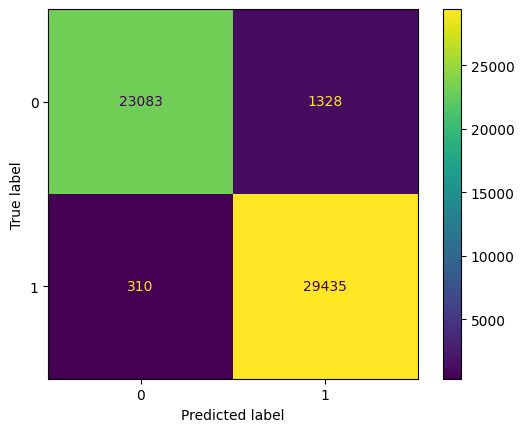

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

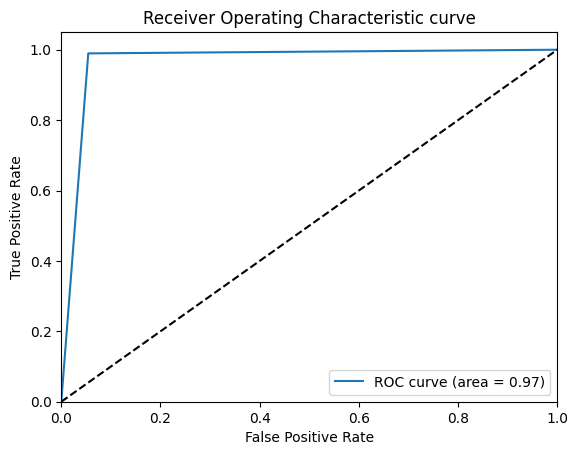

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

**Naive Bayes**

In [ ]:
# Instantiate the classifier
nb = GaussianNB()

# Fit the model on the training data
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

In [ ]:
# Evaluate the model using accuracy score, F1 score, confusion matrix, sensitivity, specificity and ROC AUC score

print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("F1 score:", round(f1_score(y_test, y_pred),3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("MCC :", round(matthews_corrcoef(y_test, y_pred),3))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob = nb.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", round(roc_auc,3))

Accuracy: 0.923
F1 score: 0.933
Confusion Matrix:
 [[20550  3861]
 [  334 29411]]
MCC : 0.849
Sensitivity: 0.989
Specificity: 0.842
ROC AUC score: 0.915


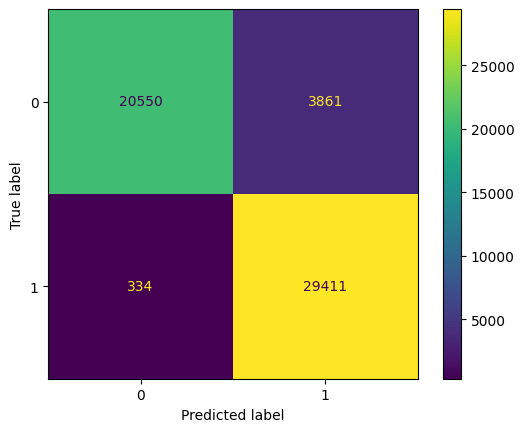

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

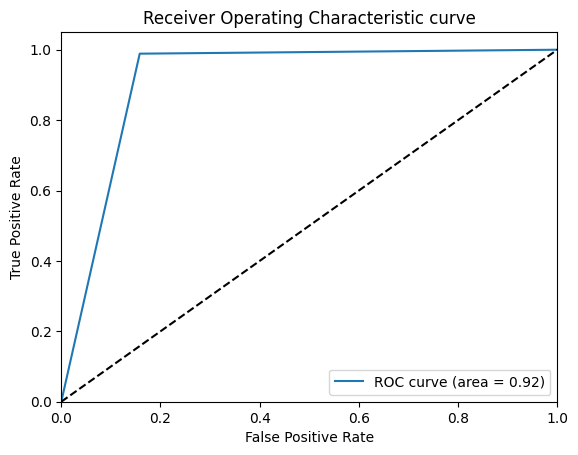

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

**XG Boost**

In [ ]:
import xgboost as xgb

# Define the model
xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb.predict(X_test)

y_pred_prob = xgb.predict_proba(X_test)[:,1]

In [ ]:
# Evaluate the model using accuracy score, F1 score, confusion matrix, sensitivity, specificity and ROC AUC score

print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("F1 score:", round(f1_score(y_test, y_pred),3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("MCC :", round(matthews_corrcoef(y_test, y_pred),3))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob = xgb.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC score:", round(roc_auc,3))

Accuracy: 0.975
F1 score: 0.978
Confusion Matrix:
 [[23071  1340]
 [    4 29741]]
MCC : 0.951
Sensitivity: 1.0
Specificity: 0.945
ROC AUC score: 0.973


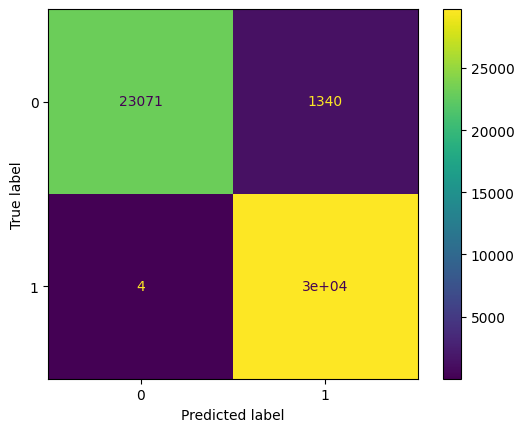

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

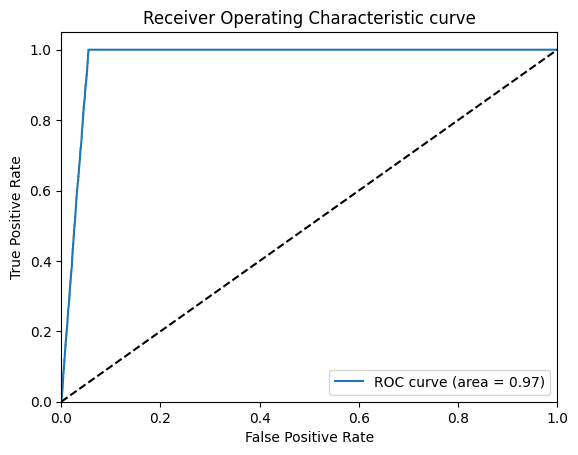

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

**KNN**

In [ ]:
# Define the model
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',leaf_size=30,p=2)
# Train the model
knn.fit(X_train,y_train)
# Make predictions on the test set
y_pred = knn.predict(X_test)

y_pred_prob = knn.predict_proba(X_test)[:,1]

In [ ]:
# Evaluate the model using accuracy score, F1 score, confusion matrix, sensitivity, specificity and ROC AUC score

print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("F1 score:", round(f1_score(y_test, y_pred),3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("MCC :", round(matthews_corrcoef(y_test, y_pred),3))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC score:", round(roc_auc,3))

Accuracy: 0.736
F1 score: 0.763
Confusion Matrix:
 [[16928  7483]
 [ 6802 22943]]
MCC : 0.466
Sensitivity: 0.771
Specificity: 0.693
ROC AUC score: 0.807


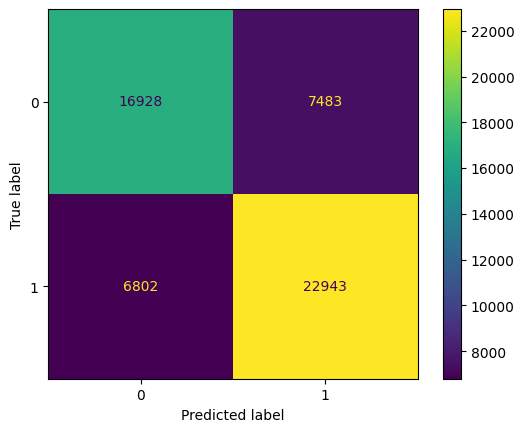

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

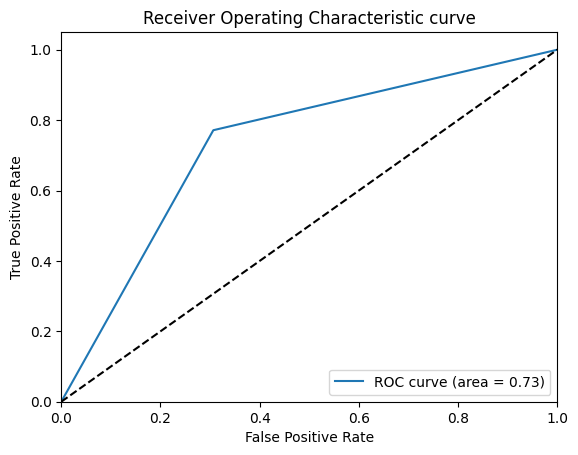

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

**2.Analyzing if the order_status "Suspected Fraud" is the reason for decline in sales market of DataCo**

In [ ]:
df['Order Status']=df['Order Status'].replace('SUSPECTED_FRAUD',1)
df['Order Status']=df['Order Status'].replace(['COMPLETE','PENDING','CLOSED','PENDING_PAYMENT','CANCELED','PROCESSING','ON_HOLD','PAYMENT_REVIEW'],0)
df['Order Status']

0         0
1         0
2         0
3         0
4         0
         ..
180514    0
180515    0
180516    0
180517    0
180518    0
Name: Order Status, Length: 180519, dtype: int64

In [ ]:
X = df[['Days for shipping (real)','Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Product Price']]
y=df['Order Status']

In [ ]:
corr_matrix = np.corrcoef(X, y, rowvar=False)
corr_coeffs = corr_matrix[:-1, -1]
print('Correlation coefficients:')
for i in range(len(corr_coeffs)):
    print(f'Independent variable {i+1}: {corr_coeffs[i]:.3f}')

Correlation coefficients:
Independent variable 1: -0.000
Independent variable 2: -0.003
Independent variable 3: -0.001
Independent variable 4: -0.001
Independent variable 5: 0.001
Independent variable 6: 0.002
Independent variable 7: 0.000
Independent variable 8: -0.002
Independent variable 9: -0.001
Independent variable 10: -0.001
Independent variable 11: -0.001
Independent variable 12: -0.001
Independent variable 13: 0.000
